# k-fold tabpfn

## Cohort 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Fold settings and corresponding S@98 values
fold_counts = [3, 5, 8, 10]
s98_values = [
    [0.4706, 0.3529, 0.3529],  # 3-Fold
    [0.6667, 0.6667, 0.6000, 0.8500, 0.5500],  # 5-Fold
    [0.5385, 0.6923, 0.4615, 0.4615, 0.6923, 0.8462, 0.7500, 0.3333],  # 8-Fold
    [0.9091, 0.8182, 0.5000, 0.9000, 0.4000, 0.6000, 0.9000, 0.9000, 0.7000, 0.4000]  # 10-Fold
]

# Calculate mean S@98 for each fold count
mean_s98 = [np.mean(values) for values in s98_values]
stds = [np.std(values) for values in s98_values]

# Plot the original points and mean values
plt.figure(figsize=(8, 6))

# Plot individual points with high transparency
for i, fold in enumerate(fold_counts):
    plt.scatter([fold] * len(s98_values[i]), s98_values[i], alpha=0.3, color='blue')

# Plot mean values
plt.plot(fold_counts, mean_s98, marker='o', linestyle='-', color='red', label="Mean S@98")
plt.errorbar(fold_counts, mean_s98, yerr=stds, fmt='o', color='red', capsize=5, label="Deviation")


# Formatting the plot
plt.xlabel("Number of Folds", fontsize=22)
plt.ylabel("S@98", fontsize=22)
plt.xticks(fold_counts, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 1)
plt.title("S@98 vs. Number of Folds (Cohort 1)", fontsize=24)
plt.legend()
plt.grid(True)
plt.show()

## Cohort 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Fold settings and corresponding S@98 values
fold_counts = [3, 5, 8, 10]
s98_values = [
    [0.3097, 0.3858, 0.2940],  # 3-Fold
    [0.2576, 0.1747, 0.2882, 0.2237, 0.4518],  # 5-Fold
    [0.2587, 0.3217, 0.2238, 0.0979, 0.3077, 0.1748, 0.3706, 0.1761],  # 8-Fold
    [0.3304, 0.3478, 0.4174, 0.0439, 0.2719, 0.1930, 0.2105, 0.4386, 0.4825, 0.1404]  # 10-Fold
]

# Calculate mean S@98 for each fold count
mean_s98 = [np.mean(values) for values in s98_values]
stds = [np.std(values) for values in s98_values]


# Plot the original points and mean values
plt.figure(figsize=(8, 6))

# Plot individual points with high transparency
for i, fold in enumerate(fold_counts):
    plt.scatter([fold] * len(s98_values[i]), s98_values[i], alpha=0.3, color='blue')

# Plot mean values
plt.plot(fold_counts, mean_s98, marker='o', linestyle='-', color='red', label="Mean S@98")
plt.errorbar(fold_counts, mean_s98, yerr=stds, fmt='o', color='red', capsize=5, label="Deviation")

# Formatting the plot
plt.xlabel("Number of Folds", fontsize=22)
plt.ylabel("S@98", fontsize=22)
plt.xticks(fold_counts, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 1)
plt.title("S@98 vs. Number of Folds (Cohort 2)", fontsize=24)
plt.legend()
plt.grid(True)
plt.show()

## Compare with other baseline

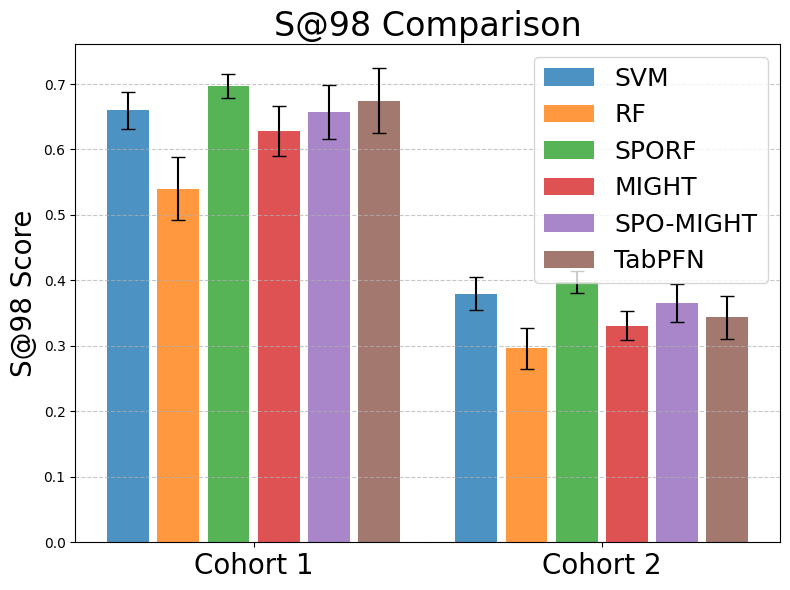

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Methods
methods = ["SVM", "RF", "SPORF", "MIGHT", "SPO-MIGHT", "TabPFN"]

# Data means for Cohort 1 and Cohort 2
means_cohort1 = [0.660, 0.540, 0.697, 0.628, 0.657, 0.6745]
means_cohort2 = [0.380, 0.296, 0.398, 0.331, 0.366, 0.3435]

# Standard deviations for Cohort 1 and Cohort 2
stds_cohort1 = [0.028, 0.048, 0.019, 0.038, 0.041, 0.0499]
stds_cohort2 = [0.025, 0.031, 0.017, 0.022, 0.029, 0.0334]

# X locations for the two groups (Cohort 1 and Cohort 2)
x_labels = ["Cohort 1", "Cohort 2"]
x = np.arange(len(x_labels))

# Width of each bar
bar_width = 0.12

# Offset for each method
offsets = np.linspace(-bar_width * (len(methods) / 2), bar_width * (len(methods) / 2), len(methods))

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

for i, method in enumerate(methods):
    ax.bar(x + offsets[i], [means_cohort1[i], means_cohort2[i]], 
           yerr=[stds_cohort1[i], stds_cohort2[i]], capsize=5, 
           width=bar_width, label=method, alpha=0.8)

# Labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=20)
ax.set_ylabel("S@98 Score", fontsize=20)
ax.set_title("S@98 Comparison", fontsize=24)
ax.legend(loc="upper right", fontsize=18)
ax.grid(axis='y', linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

## PCA or not PCA

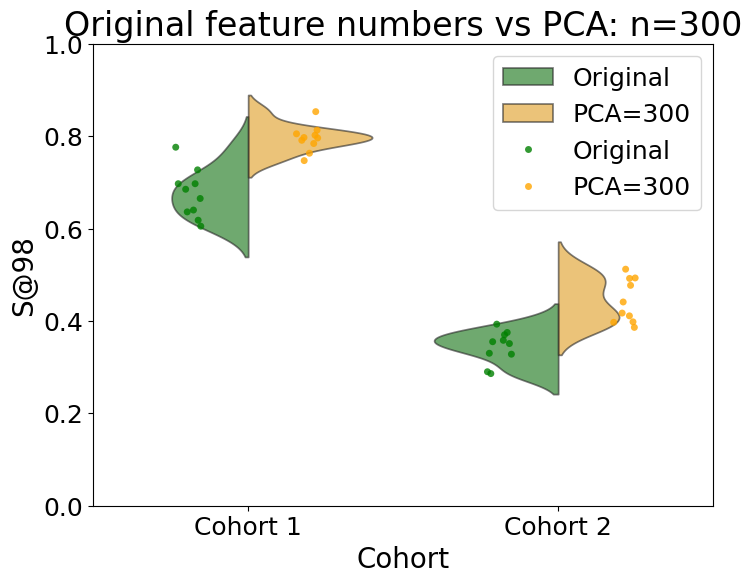

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Êï∞ÊçÆ
cohorts = ["Cohort 1", "Cohort 2"]
methods = ["Original", "PCA=300"]

# ÂéüÂßãÊï∞ÊçÆÔºàÊú™‰ΩøÁî® PCAÔºâ
original_s98 = {
    "Cohort 1": [0.618, 0.776, 0.727, 0.636, 0.697, 0.640, 0.605, 0.685, 0.665, 0.697],
    "Cohort 2": [0.351, 0.286, 0.355, 0.393, 0.328, 0.330, 0.375, 0.370, 0.290, 0.358],
}

# PCA=300 Êï∞ÊçÆ
pca_s98 = {
    "Cohort 1": [0.747, 0.853, 0.784, 0.802, 0.796, 0.805, 0.763, 0.797, 0.791, 0.813],
    "Cohort 2": [0.512, 0.386, 0.492, 0.397, 0.398, 0.477, 0.441, 0.493, 0.411, 0.417],
}

# ÂàõÂª∫ DataFrame
data = []
for cohort in cohorts:
    for value in original_s98[cohort]:
        data.append([cohort, "Original", value])
    for value in pca_s98[cohort]:
        data.append([cohort, "PCA=300", value])

df = pd.DataFrame(data, columns=["Cohort", "Method", "S@98"])

# Áîª Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Cohort", y="S@98", hue="Method", data=df, split=True, inner=None, alpha=0.6, palette={"Original": "green", "PCA=300": "orange"})

# Ê†áÊ≥®ÂéüÂßãÊï∞ÊçÆÁÇπ
sns.stripplot(x="Cohort", y="S@98", hue="Method", data=df, jitter=True, dodge=True, marker="o", alpha=0.8, palette={"Original": "green", "PCA=300": "orange"})

plt.title("Original feature numbers vs PCA: n=300", fontsize=24)
plt.legend(fontsize=18)
plt.xlabel("Cohort", fontsize=20)
plt.ylabel("S@98", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 1)
plt.show()

# OpenML_CC18 dataset

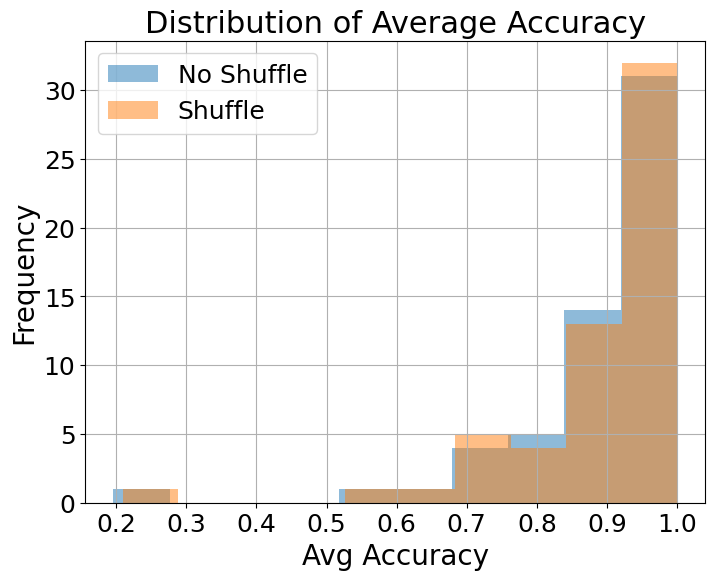

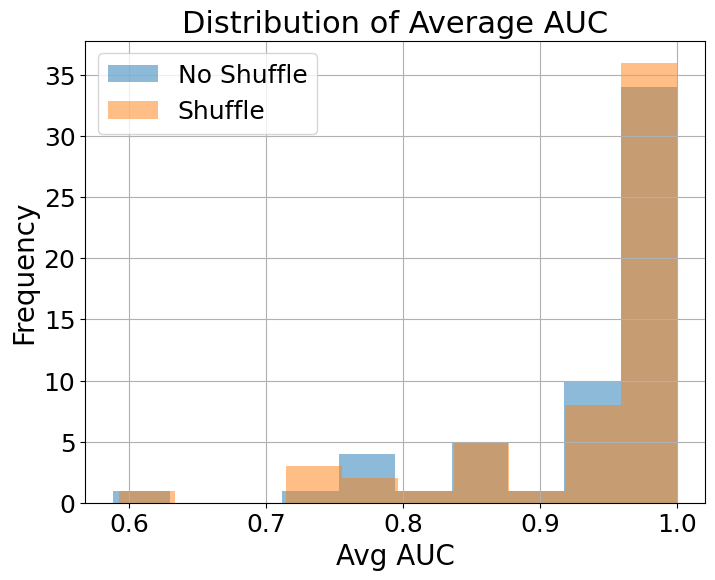

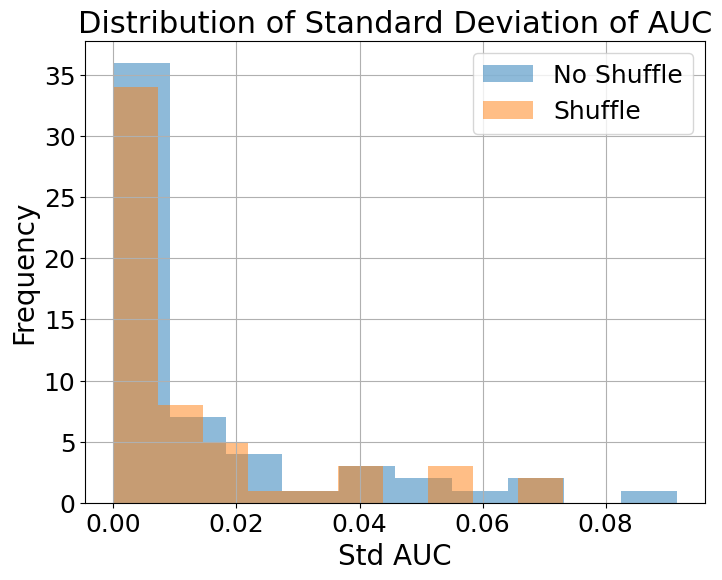

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("default")

# Êñá‰ª∂Âêç
file_no_shuffle = "tabpfn_openml_results_noShuffle.csv"
file_shuffle = "tabpfn_openml_results.csv"

# ËØªÂèñÊï∞ÊçÆ
df_no_shuffle = pd.read_csv(file_no_shuffle)
df_shuffle = pd.read_csv(file_shuffle)

# ÂêàÂπ∂Êï∞ÊçÆÔºåÁ°Æ‰øùÊï∞ÊçÆÈõÜÁºñÂè∑‰∏ÄËá¥
df_merged = df_no_shuffle.merge(df_shuffle, on="Dataset", suffixes=("_NoShuffle", "_Shuffle"))

# ÈÄâÊã©ÂØπÊØîÁöÑÊåáÊ†á
metrics = ["Avg Accuracy", "Std Accuracy", "Avg AUC", "Std AUC"]
titles = ["Average Accuracy", "Standard Deviation of Accuracy", "Average AUC", "Standard Deviation of AUC"]

# ÁîªÂõæ
for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 6))
    
    plt.hist(df_merged[f"{metric}_NoShuffle"], bins=10, alpha=0.5, label="No Shuffle")
    plt.hist(df_merged[f"{metric}_Shuffle"], bins=10, alpha=0.5, label="Shuffle")

    plt.xlabel(metric, fontsize=20)
    plt.xticks(fontsize=18)
    plt.ylabel("Frequency", fontsize=20)
    plt.yticks(fontsize=18)
    plt.title(f"Distribution of {titles[i]}", fontsize=22)
    plt.legend(fontsize=18)
    plt.grid(True)

    plt.show()

# ÁîªÊï£ÁÇπÂõæÁúãshuffleÂØπÂáÜÁ°ÆÁéáÁöÑÂΩ±Âìç
plt.figure(figsize=(8, 8))
plt.scatter(df_merged["Avg Accuracy_NoShuffle"], df_merged["Avg Accuracy_Shuffle"], alpha=0.7)
plt.plot([0, 1], [0, 1], linestyle="--", color="red")  # ÂèÇËÄÉÁ∫ø
plt.xlabel("Avg Accuracy (No Shuffle)", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Avg Accuracy (Shuffle)", fontsize=22)
plt.title("Impact of Shuffling on Accuracy", fontsize=24)
plt.grid(True)
plt.show()

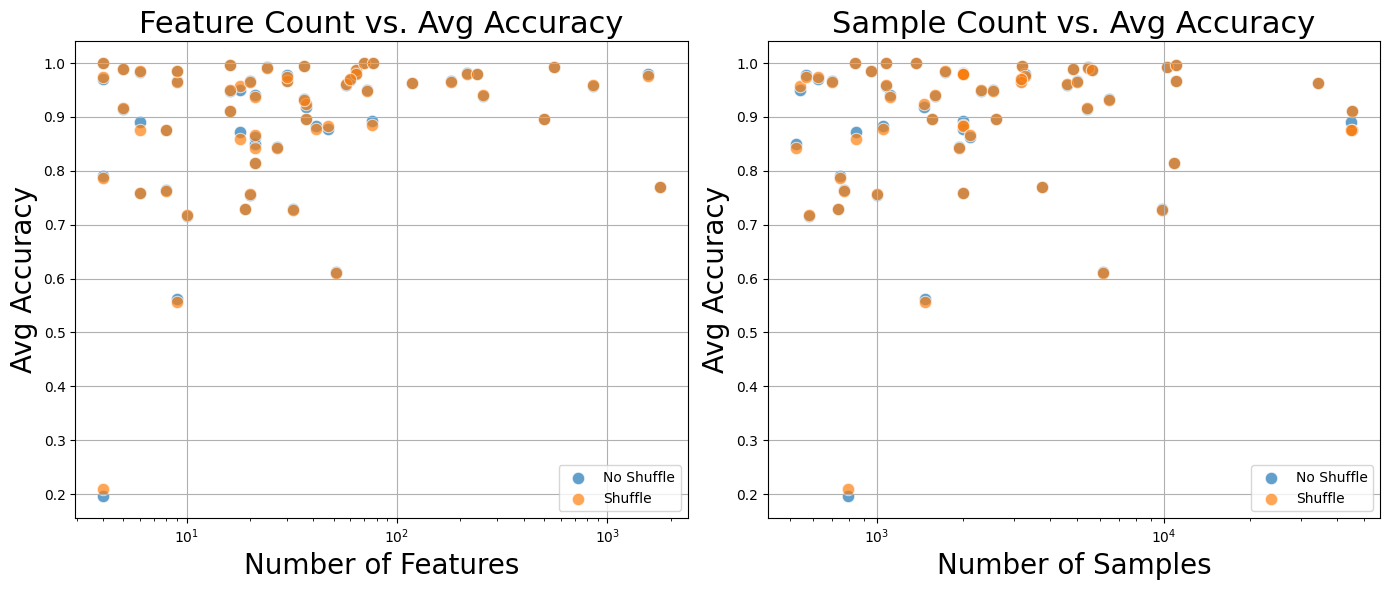

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ËÆæÁΩÆ Matplotlib ‰∏ªÈ¢ò‰∏∫ÈªòËÆ§ÔºàÁôΩËâ≤ËÉåÊôØÔºâ
plt.style.use("default")

def get_dataset_info(data_folder):
    """
    ÈÅçÂéÜ data_folder ÁõÆÂΩï‰∏ãÁöÑ CSV Êñá‰ª∂ÔºåËÆ°ÁÆóÊØè‰∏™Êï∞ÊçÆÈõÜÁöÑÁâπÂæÅÊï∞ÈáèÂíåÊ†∑Êú¨Êï∞Èáè„ÄÇ
    Ê†∑Êú¨Êï∞Èáè‰∏∫Êñá‰ª∂‰∏≠ÁöÑÊÄªË°åÊï∞ÔºàÂÅáÂÆöÊñá‰ª∂Á¨¨‰∏ÄË°å‰∏∫Ë°®Â§¥Ôºâ„ÄÇ
    ÁâπÂæÅÊï∞Èáè‰∏∫ÊÄªÂàóÊï∞ÂáèÂéª1ÔºàÂÅáÂÆöÊúÄÂêé‰∏ÄÂàó‰∏∫Ê†áÁ≠æÔºâ„ÄÇ
    
    ÂèÇÊï∞Ôºö
        data_folder (str): Â≠òÊîæ CSV Êñá‰ª∂ÁöÑÊï∞ÊçÆÊñá‰ª∂Â§πË∑ØÂæÑ„ÄÇ
    
    ËøîÂõûÔºö
        pd.DataFrame: ÂåÖÂê´ Dataset, Samples, Features ÁöÑ DataFrame„ÄÇ
    """
    dataset_info = []

    # Ëé∑ÂèñÊñá‰ª∂ÂàóË°®
    file_list = [f for f in os.listdir(data_folder) if f.endswith(".csv")]

    # ÈÅçÂéÜÊâÄÊúâ CSV Êñá‰ª∂
    for file in file_list:
        file_path = os.path.join(data_folder, file)
        try:
            df = pd.read_csv(file_path)
            num_features = df.shape[1] - 1  # ÁâπÂæÅÊï∞ÈáèÔºàÊÄªÂàóÊï∞ - 1Ôºâ
            num_samples = df.shape[0]       # Ê†∑Êú¨Êï∞ÈáèÔºàÂåÖÊã¨Ë°®Â§¥‰ª•Â§ñÁöÑÊâÄÊúâË°åÔºâ
            dataset_info.append([file, num_samples, num_features])
        except Exception as e:
            print(f"Error processing {file}: {e}")

    # ÂàõÂª∫ DataFrame
    df_dataset_info = pd.DataFrame(dataset_info, columns=["Dataset", "Samples", "Features"])
    return df_dataset_info

# ËÆæÁΩÆÊï∞ÊçÆÈõÜÁõÆÂΩïÔºàËØ∑Á°Æ‰øùËØ•ÁõÆÂΩï‰∏éËÑöÊú¨Âú®Âêå‰∏ÄÁõÆÂΩïÊàñ‰øÆÊîπ‰∏∫ÁªùÂØπË∑ØÂæÑÔºâ
data_folder = "data_OpenML_CC18"

# ËÆ°ÁÆóÊØè‰∏™Êï∞ÊçÆÈõÜÁöÑÁâπÂæÅÊï∞ÈáèÂíåÊ†∑Êú¨Êï∞Èáè
df_dataset_info = get_dataset_info(data_folder)

# ËØªÂèñÁªìÊûúÊñá‰ª∂
file_no_shuffle = "tabpfn_openml_results_noShuffle.csv"
file_shuffle = "tabpfn_openml_results.csv"

df_no_shuffle = pd.read_csv(file_no_shuffle)
df_shuffle = pd.read_csv(file_shuffle)

# ÊèêÂèñÂØπÂ∫îÁöÑ Avg Accuracy ÂàóÔºåÂπ∂ÈáçÂëΩÂêç
df_no_shuffle = df_no_shuffle[["Dataset", "Avg Accuracy"]].rename(columns={"Avg Accuracy": "Avg Accuracy_NoShuffle"})
df_shuffle = df_shuffle[["Dataset", "Avg Accuracy"]].rename(columns={"Avg Accuracy": "Avg Accuracy_Shuffle"})

# ÂêàÂπ∂Êï∞ÊçÆÔºà‰ª• Dataset ‰∏∫ÈîÆÔºâ
df_merged = df_dataset_info.merge(df_no_shuffle, on="Dataset", how="left")
df_merged = df_merged.merge(df_shuffle, on="Dataset", how="left")

# ÊâìÂç∞ÂêàÂπ∂ÂêéÁöÑË°®Ê†º
df_merged.to_csv("dataset_accuracy_comparison.csv", index=False)

# ÁªòÂà∂Êï£ÁÇπÂõæ
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Âõæ1ÔºöÁâπÂæÅÊï∞Èáè vs. Avg Accuracy
sns.scatterplot(data=df_merged, x="Features", y="Avg Accuracy_NoShuffle", 
                alpha=0.7, label="No Shuffle", ax=axes[0], s=80)
sns.scatterplot(data=df_merged, x="Features", y="Avg Accuracy_Shuffle", 
                alpha=0.7, label="Shuffle", ax=axes[0], s=80)
axes[0].set_xlabel("Number of Features", fontsize=20)
axes[0].set_xscale("log")
axes[0].set_ylabel("Avg Accuracy", fontsize=20)
axes[0].set_title("Feature Count vs. Avg Accuracy", fontsize=22)
axes[0].grid(True)
axes[0].legend()

# Âõæ2ÔºöÊ†∑Êú¨Êï∞Èáè vs. Avg Accuracy
sns.scatterplot(data=df_merged, x="Samples", y="Avg Accuracy_NoShuffle", 
                alpha=0.7, label="No Shuffle", ax=axes[1], s=80)
sns.scatterplot(data=df_merged, x="Samples", y="Avg Accuracy_Shuffle", 
                alpha=0.7, label="Shuffle", ax=axes[1], s=80)
axes[1].set_xlabel("Number of Samples", fontsize=20)
axes[1].set_xscale("log")
axes[1].set_ylabel("Avg Accuracy", fontsize=20)
axes[1].set_title("Sample Count vs. Avg Accuracy", fontsize=22)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

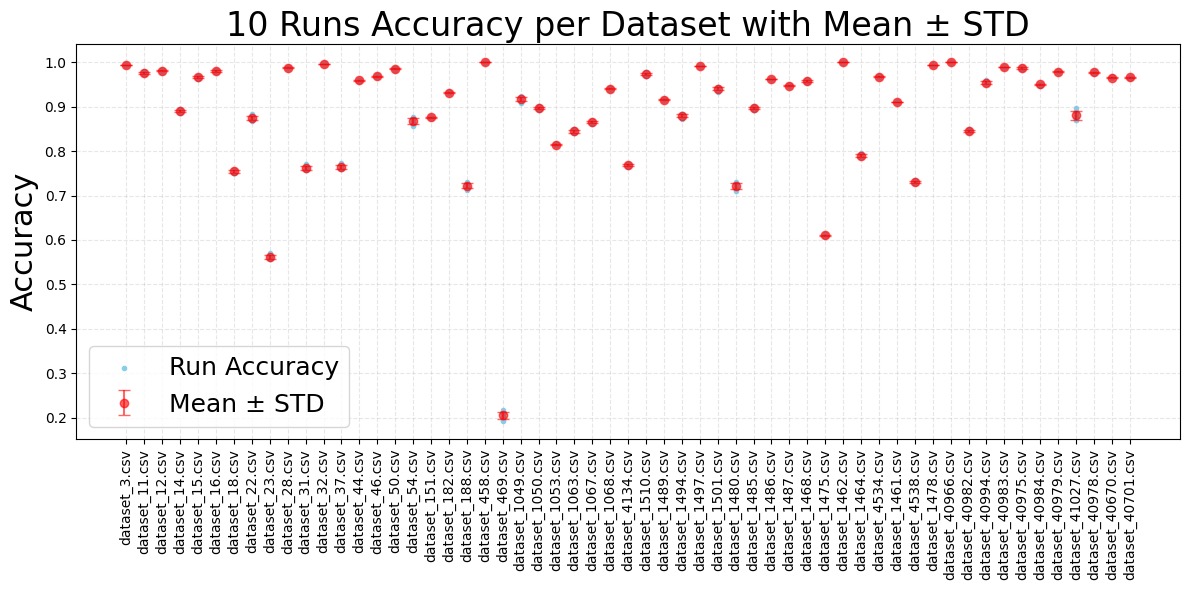

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("default")

# ËØªÂèñÊï∞ÊçÆÔºàËØ∑Á°Æ‰øùË∑ØÂæÑÊ≠£Á°ÆÔºâ
df = pd.read_csv("result/TabPFN_CC18_10Times.csv")  # ÊõøÊç¢‰∏∫‰Ω†Ëá™Â∑±ÁöÑÊñá‰ª∂Ë∑ØÂæÑ


# ÂáÜÂ§áÊï∞ÊçÆ
accuracy_cols = [f"Avg Accuracy{f'.{i}' if i > 0 else ''}" for i in range(10)]
datasets = df["Dataset"]
x = np.arange(len(datasets))  # Ê®™ÂùêÊ†á‰ΩçÁΩÆ

# ËÆæÁΩÆÂõæÂÉè
plt.figure(figsize=(12, 6))

# ÁªòÂà∂ÊØè‰∏™Êï∞ÊçÆÈõÜÁöÑ10Ê¨° accuracyÔºàËìùËâ≤Êï£ÁÇπÔºâ
for i in range(len(df)):
    y_vals = df.loc[i, accuracy_cols].values
    plt.scatter([x[i]] * 10, y_vals, color='skyblue',marker='.', alpha=1, label="Run Accuracy" if i == 0 else "")

# ÁªòÂà∂Âπ≥ÂùáÂÄºÂíåÊ†áÂáÜÂ∑ÆÔºàÁ∫¢ÁÇπ+ËØØÂ∑ÆÁ∫øÔºâ
plt.errorbar(x, df["AVG"], yerr=df["STD"], fmt='o', color='red', alpha=0.6, capsize=4, label="Mean ¬± STD")

# ËÆæÁΩÆÂõæ‰æãÂíåÊ†áÁ≠æ
plt.xticks(x, datasets, rotation=90)
plt.ylabel("Accuracy", fontsize=22)
plt.title("10 Runs Accuracy per Dataset with Mean ¬± STD", fontsize=24)
plt.legend(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

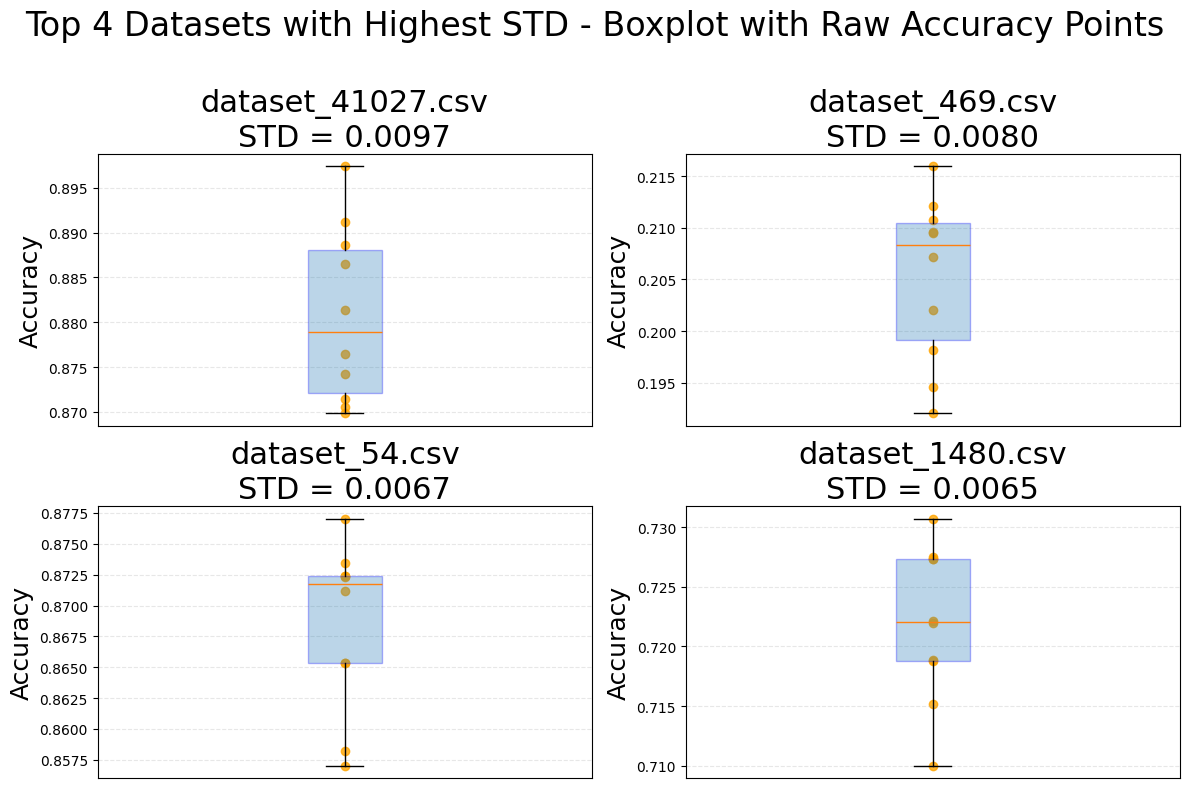

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv("result/TabPFN_CC18_10Times.csv")  # ‰øÆÊîπ‰∏∫‰Ω†ÁöÑË∑ØÂæÑ

# ÂáÜÂ§áÂàóÂêç
accuracy_cols = [f"Avg Accuracy{f'.{i}' if i > 0 else ''}" for i in range(10)]

# ÈÄâÂá∫Ê†áÂáÜÂ∑ÆÊúÄÂ§ßÁöÑÂâç4‰∏™Êï∞ÊçÆÈõÜ
top4_df = df.sort_values(by="STD", ascending=False).head(4).reset_index(drop=True)

# ÂàõÂª∫Âõõ‰∏™Â≠êÂõæ
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i in range(4):
    dataset = top4_df.loc[i, "Dataset"]
    y_vals = top4_df.loc[i, accuracy_cols].values

    # ÁÆ±Á∫øÂõæ
    axs[i].boxplot(y_vals, vert=True, patch_artist=True,
                   boxprops=dict(alpha=0.3, color='blue'),)

    # ÂéüÂßãÊï£ÁÇπÊï∞ÊçÆ
    axs[i].scatter(np.ones_like(y_vals), y_vals, color='orange', alpha=0.8, label="Raw Data Points")

    # ËÆæÁΩÆÊ†áÈ¢òÂíåÊ†∑Âºè
    axs[i].set_title(f"{dataset}\nSTD = {top4_df.loc[i, 'STD']:.4f}", fontsize=22)
    axs[i].set_ylabel("Accuracy", fontsize=18)
    axs[i].set_xticks([])  # ÈöêËóèxËΩ¥ÂàªÂ∫¶
    axs[i].grid(True, linestyle='--', alpha=0.3)

# ÊÄªÊ†áÈ¢òÂíåÂ∏ÉÂ±ÄË∞ÉÊï¥
plt.suptitle("Top 4 Datasets with Highest STD - Boxplot with Raw Accuracy Points", fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

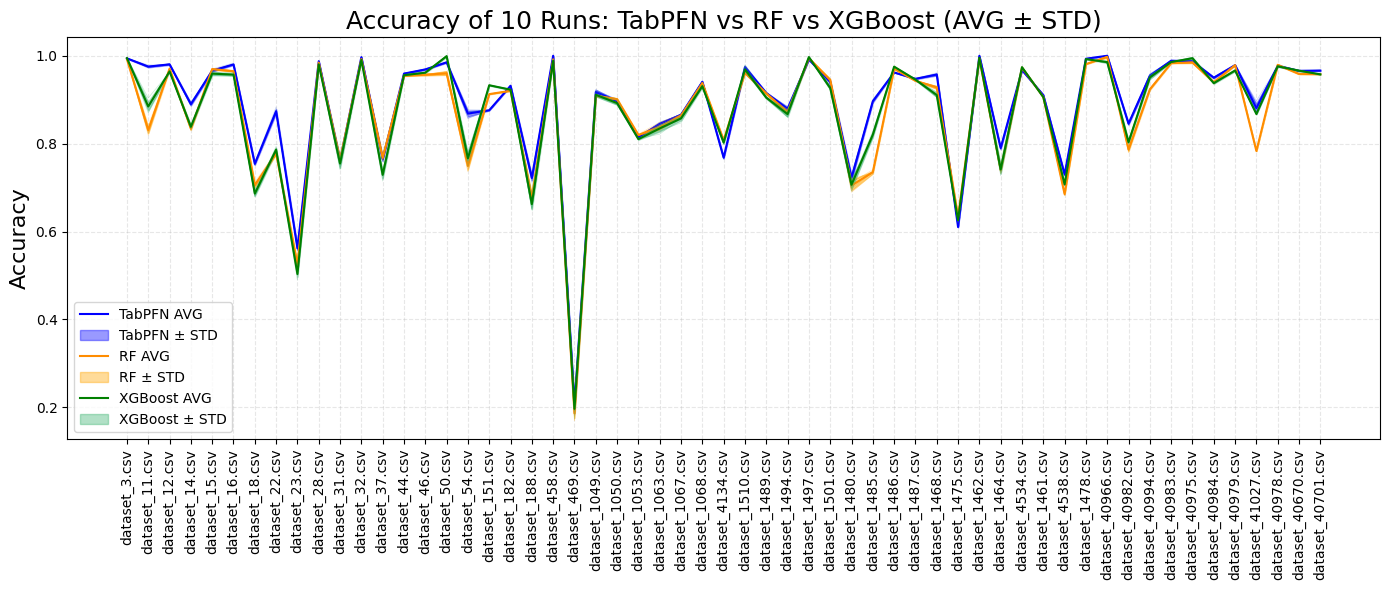

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("default")

# ËØªÂèñ‰∏â‰∏™Ê®°ÂûãÁöÑÁªìÊûú
tabpfn_df = pd.read_csv("result/TabPFN_CC18_10Times.csv")
rf_df = pd.read_csv("result/RF_CC18_10Times.csv")
xgb_df = pd.read_csv("result/XGBoost_CC18_10Times.csv")

# 10Ê¨°ÂáÜÁ°ÆÁéáÁöÑÂàóÂêç
acc_cols = [f"Avg Accuracy{f'.{i}' if i > 0 else ''}" for i in range(10)]
datasets = tabpfn_df["Dataset"]
x = np.arange(len(datasets))  # Ê®™ËΩ¥ÂùêÊ†á

# Â∞ÜÂπ≥ÂùáÂÄºÂíåÊ†áÂáÜÂ∑ÆËΩ¨Êç¢‰∏∫ numpy Êï∞ÁªÑ
tabpfn_avg = tabpfn_df["AVG"].astype(float).to_numpy()
tabpfn_std = tabpfn_df["STD"].astype(float).to_numpy()
rf_avg = rf_df["AVG"].astype(float).to_numpy()
rf_std = rf_df["STD"].astype(float).to_numpy()
xgb_avg = xgb_df["AVG"].astype(float).to_numpy()
xgb_std = xgb_df["STD"].astype(float).to_numpy()

# ÂºÄÂßãÁªòÂõæ
plt.figure(figsize=(14, 6))

# TabPFN ÁöÑ10Ê¨°ËøêË°åÔºàÊ∑°ËìùËâ≤Ôºâ
for i in range(10):
    plt.plot(x, tabpfn_df[acc_cols[i]], color='royalblue', alpha=0.3, linewidth=0.5)
# TabPFN Âπ≥ÂùáÂÄº+Ê†áÂáÜÂ∑Æ
plt.plot(x, tabpfn_avg, color='blue', label="TabPFN AVG", linewidth=1.5)
plt.fill_between(x, tabpfn_avg - tabpfn_std, tabpfn_avg + tabpfn_std,
                 color='blue', alpha=0.4, label="TabPFN ¬± STD")

# RF ÁöÑ10Ê¨°ËøêË°åÔºàÊ∑°Ê©ôËâ≤Ôºâ
for i in range(10):
    plt.plot(x, rf_df[acc_cols[i]], color='orange', alpha=0.3, linewidth=0.5)
# RF Âπ≥ÂùáÂÄº+Ê†áÂáÜÂ∑Æ
plt.plot(x, rf_avg, color='darkorange', label="RF AVG", linewidth=1.5)
plt.fill_between(x, rf_avg - rf_std, rf_avg + rf_std,
                 color='orange', alpha=0.4, label="RF ¬± STD")

# XGBoost ÁöÑ10Ê¨°ËøêË°åÔºàÊ∑°ÁªøËâ≤Ôºâ
for i in range(10):
    plt.plot(x, xgb_df[acc_cols[i]], color='mediumseagreen', alpha=0.3, linewidth=0.5)
# XGBoost Âπ≥ÂùáÂÄº+Ê†áÂáÜÂ∑Æ
plt.plot(x, xgb_avg, color='green', label="XGBoost AVG", linewidth=1.5)
plt.fill_between(x, xgb_avg - xgb_std, xgb_avg + xgb_std,
                 color='mediumseagreen', alpha=0.4, label="XGBoost ¬± STD")

# ÁæéÂåñÂõæÂΩ¢
plt.xticks(x, datasets, rotation=90)
plt.ylabel("Accuracy", fontsize=16)
plt.title("Accuracy of 10 Runs: TabPFN vs RF vs XGBoost (AVG ¬± STD)", fontsize=18)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ËØªÂèñÊï∞ÊçÆÔºàÊõøÊç¢‰∏∫‰Ω†ÁöÑÊñá‰ª∂Ë∑ØÂæÑÔºâ
tabpfn_df = pd.read_csv("result/TabPFN_CC18_10Times.csv")
rf_df = pd.read_csv("result/RF_CC18_10Times.csv")
xgb_df = pd.read_csv("result/XGBoost_CC18_10Times.csv")

# ÊûÑÂª∫Ê†áÂáÜÂ∑ÆÂØπÊØîË°®
std_compare_df = pd.DataFrame({
    "Dataset": tabpfn_df["Dataset"],
    "TabPFN_STD": tabpfn_df["STD"].astype(float),
    "RF_STD": rf_df["STD"].astype(float),
    "XGBoost_STD": xgb_df["STD"].astype(float)
})

# ËΩ¨Êç¢‰∏∫ÈïøÊ†ºÂºè‰ª•‰æø‰ΩøÁî® seaborn
std_long_df = std_compare_df.melt(id_vars="Dataset", 
                                  var_name="Method", 
                                  value_name="STD")

# ËÆæÁΩÆÁªòÂõæÈ£éÊ†º
plt.figure(figsize=(14, 6))
sns.barplot(data=std_long_df, x="Dataset", y="STD", hue="Method", palette=["blue", "orange", "green"])

# ÂõæÂΩ¢ÁæéÂåñ
plt.title("Standard Deviation Comparison: TabPFN vs RF", fontsize=24)
plt.ylabel("Standard Deviation (STD)", fontsize=22)
plt.xlabel("Dataset", fontsize=22)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.legend(title="Method")
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ËØªÂèñ‰∏§‰∏™Ê®°ÂûãÁªìÊûúÊñá‰ª∂ÔºàËØ∑ÊõøÊç¢‰∏∫‰Ω†ÁöÑÊñá‰ª∂Ë∑ØÂæÑÔºâ
tabpfn_df = pd.read_csv("result/TabPFN_CC18_10Times.csv")
rf_df = pd.read_csv("result/RF_CC18_10Times.csv")
xgb_df = pd.read_csv("result/XGBoost_CC18_10Times.csv")

# Ëé∑ÂèñÂàóÂêç
acc_cols = [f"Avg Accuracy{f'.{i}' if i > 0 else ''}" for i in range(10)]
datasets = tabpfn_df["Dataset"]
x = np.arange(len(datasets))  # Ê®™ËΩ¥‰ΩçÁΩÆ

# Âπ≥ÂùáÂÄº‰∏éÊ†áÂáÜÂ∑Æ
tabpfn_avg = tabpfn_df["AVG"].astype(float)
tabpfn_std = tabpfn_df["STD"].astype(float)
rf_avg = rf_df["AVG"].astype(float)
rf_std = rf_df["STD"].astype(float)
xgb_avg = xgb_df["AVG"].astype(float)
xgb_std = xgb_df["STD"].astype(float)

# ÁªòÂõæ
plt.figure(figsize=(14, 6))
width = 0.35  # ÊéßÂà∂‰∏§‰∏™ÊñπÊ≥ïÁöÑ x ‰ΩçÁΩÆÂÅèÁßªÈáè

# ÁªòÂà∂ÊØè‰∏™Êï∞ÊçÆÈõÜÁöÑ10Ê¨°ËøêË°åÂáÜÁ°ÆÁéáÔºàÊï£ÁÇπÔºâ
for i in range(len(datasets)):
    # TabPFN
    tab_vals = tabpfn_df.loc[i, acc_cols].astype(float).values
    plt.scatter(np.full_like(tab_vals, x[i] - width / 2), tab_vals,
                color='royalblue', alpha=0.5, s=20)

    # RF
    rf_vals = rf_df.loc[i, acc_cols].astype(float).values
    plt.scatter(np.full_like(rf_vals, x[i] + width / 2), rf_vals,
                color='darkorange', alpha=0.5, s=20)
    
    # XGBoost
    xgb_vals = xgb_df.loc[i, acc_cols].astype(float).values
    plt.scatter(np.full_like(xgb_vals, x[i]), xgb_vals,
                color='mediumseagreen', alpha=0.5, s=20)

# Âπ≥ÂùáÂÄº + Ê†áÂáÜÂ∑ÆËØØÂ∑ÆÊù°ÔºàTabPFNÔºâ
plt.errorbar(x - width / 2, tabpfn_avg, yerr=tabpfn_std, fmt='o', color='blue',
             capsize=4, label='TabPFN AVG ¬± STD')

# Âπ≥ÂùáÂÄº + Ê†áÂáÜÂ∑ÆËØØÂ∑ÆÊù°ÔºàRFÔºâ
plt.errorbar(x + width / 2, rf_avg, yerr=rf_std, fmt='o', color='orange',
             capsize=4, label='RF AVG ¬± STD')

# Âπ≥ÂùáÂÄº + Ê†áÂáÜÂ∑ÆËØØÂ∑ÆÊù°ÔºàXGBoostÔºâ
plt.errorbar(x, xgb_avg, yerr=xgb_std, fmt='o', color='green',
             capsize=4, label='XGBoost AVG ¬± STD')

# ÂõæÂΩ¢ÁæéÂåñ
plt.xticks(x, datasets, rotation=90)
plt.ylabel("Accuracy", fontsize=22)
plt.title("TabPFN vs RF vs XGBoost: Accuracy Distribution with AVG ¬± STD", fontsize=24)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ËØªÂèñÊ®°ÂûãÁªìÊûúÊñá‰ª∂
tabpfn_df = pd.read_csv("result/TabPFN_CC18_10Times.csv")
rf_df = pd.read_csv("result/RF_CC18_10Times.csv")
xgb_df = pd.read_csv("result/XGBoost_CC18_10Times.csv")

# Ëé∑ÂèñÂáÜÁ°ÆÁéáÂàóÂêç
acc_cols = [f"Avg Accuracy{f'.{i}' if i > 0 else ''}" for i in range(10)]

# Êñ∞Âª∫ DataFrame Â≠òÂÇ®ÁªºÂêà‰ø°ÊÅØ
summary_df = pd.DataFrame({
    "Dataset": tabpfn_df["Dataset"],
    "TabPFN_AVG": tabpfn_df["AVG"].astype(float),
    "RF_AVG": rf_df["AVG"].astype(float),
    "XGB_AVG": xgb_df["AVG"].astype(float)
})

# ËÆ°ÁÆó3‰∏™Ê®°ÂûãÂπ≥ÂùáÂÄºÂπ∂ÊéíÂ∫è
summary_df["MeanAVG"] = summary_df[["TabPFN_AVG", "RF_AVG", "XGB_AVG"]].mean(axis=1)
top10 = summary_df.sort_values(by="MeanAVG", ascending=False).head(10)
bottom10 = summary_df.sort_values(by="MeanAVG", ascending=True).head(10)

def plot_accuracy_subplot(indexes, title, subplot_idx):
    datasets = tabpfn_df.loc[indexes, "Dataset"].reset_index(drop=True)
    x = np.arange(len(datasets))
    width = 0.35

    tab_avg = tabpfn_df.loc[indexes, "AVG"].astype(float).reset_index(drop=True)
    tab_std = tabpfn_df.loc[indexes, "STD"].astype(float).reset_index(drop=True)
    rf_avg = rf_df.loc[indexes, "AVG"].astype(float).reset_index(drop=True)
    rf_std = rf_df.loc[indexes, "STD"].astype(float).reset_index(drop=True)
    xgb_avg = xgb_df.loc[indexes, "AVG"].astype(float).reset_index(drop=True)
    xgb_std = xgb_df.loc[indexes, "STD"].astype(float).reset_index(drop=True)

    plt.subplot(2, 1, subplot_idx)
    for i in range(len(datasets)):
        tab_vals = tabpfn_df.loc[indexes[i], acc_cols].astype(float).values
        rf_vals = rf_df.loc[indexes[i], acc_cols].astype(float).values
        xgb_vals = xgb_df.loc[indexes[i], acc_cols].astype(float).values

        plt.scatter(np.full_like(tab_vals, x[i] - width / 2), tab_vals,
                    color='royalblue', alpha=0.5, s=20)
        plt.scatter(np.full_like(rf_vals, x[i] + width / 2), rf_vals,
                    color='darkorange', alpha=0.5, s=20)
        plt.scatter(np.full_like(xgb_vals, x[i]), xgb_vals,
                    color='mediumseagreen', alpha=0.5, s=20)

    plt.errorbar(x - width / 2, tab_avg, yerr=tab_std, fmt='o', color='blue',
                 capsize=4, label='TabPFN AVG ¬± STD' if subplot_idx == 1 else None)
    plt.errorbar(x + width / 2, rf_avg, yerr=rf_std, fmt='o', color='orange',
                 capsize=4, label='RF AVG ¬± STD' if subplot_idx == 1 else None)
    plt.errorbar(x, xgb_avg, yerr=xgb_std, fmt='o', color='green',
                 capsize=4, label='XGBoost AVG ¬± STD' if subplot_idx == 1 else None)

    plt.xticks(x, datasets, rotation=45, fontsize=18)
    plt.ylabel("Accuracy", fontsize=20)
    plt.title(title, fontsize=22)
    plt.grid(True, linestyle='--', alpha=0.3)
    if subplot_idx == 1:
        plt.legend()

# ÁªòÂõæÔºö‰∏ä‰∏ã‰∏§‰∏™ subplot
plt.figure(figsize=(14, 10))
plot_accuracy_subplot(top10.index.tolist(), "Top 10 Datasets by Accuracy (Mean across Models)", 1)
plot_accuracy_subplot(bottom10.index.tolist(), "Bottom 10 Datasets by Accuracy (Mean across Models)", 2)
plt.tight_layout()
plt.show()

# CTR23

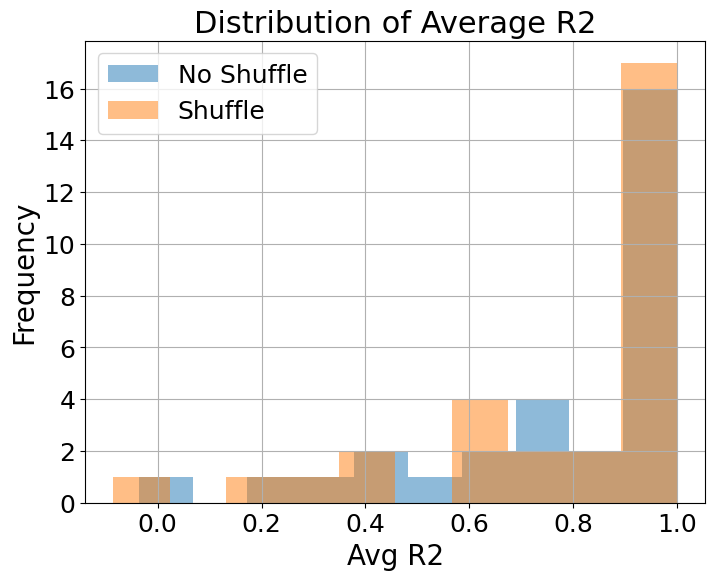

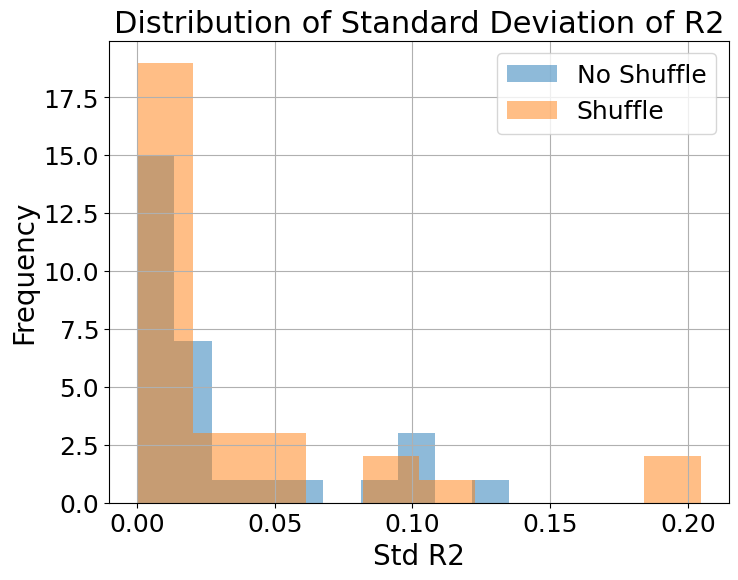

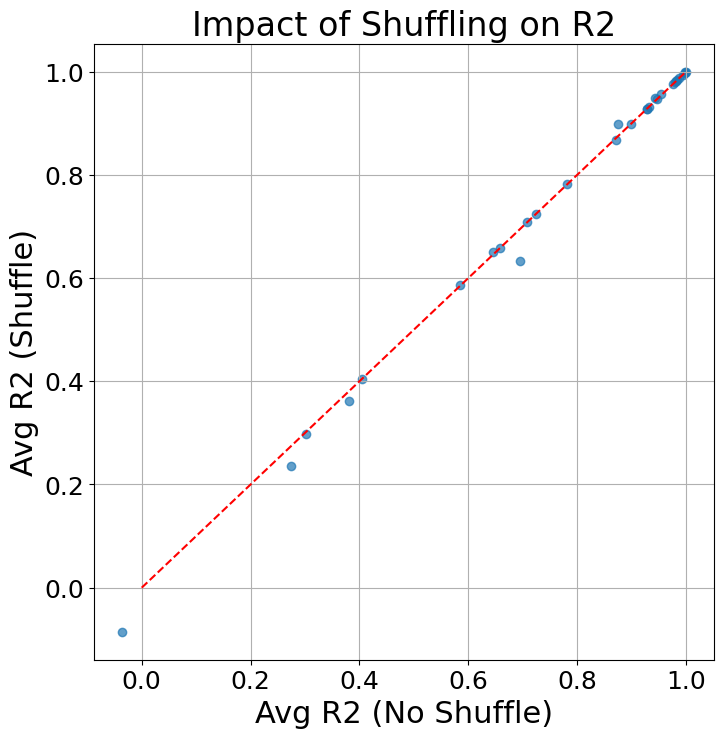

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("default")

# Êñá‰ª∂Âêç
file_no_shuffle = "tabpfn_ctr23_regression_results.csv"
file_shuffle = "tabpfn_ctr23_regression_results_Shuffle.csv"

# ËØªÂèñÊï∞ÊçÆ
df_no_shuffle = pd.read_csv(file_no_shuffle)
df_shuffle = pd.read_csv(file_shuffle)

# ÂêàÂπ∂Êï∞ÊçÆÔºåÁ°Æ‰øùÊï∞ÊçÆÈõÜÁºñÂè∑‰∏ÄËá¥
df_merged = df_no_shuffle.merge(df_shuffle, on="Dataset", suffixes=("_NoShuffle", "_Shuffle"))

# ÈÄâÊã©ÂØπÊØîÁöÑÊåáÊ†á
metrics = ["Avg R2", "Std R2"]
titles = ["Average R2", "Standard Deviation of R2"]

# ÁîªÂõæ
for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 6))
    
    plt.hist(df_merged[f"{metric}_NoShuffle"], bins=10, alpha=0.5, label="No Shuffle")
    plt.hist(df_merged[f"{metric}_Shuffle"], bins=10, alpha=0.5, label="Shuffle")

    plt.xlabel(metric, fontsize=20)
    plt.xticks(fontsize=18)
    plt.ylabel("Frequency", fontsize=20)
    plt.yticks(fontsize=18)
    plt.title(f"Distribution of {titles[i]}", fontsize=22)
    plt.legend(fontsize=18)
    plt.grid(True)

    plt.show()

# ÁîªÊï£ÁÇπÂõæÁúãshuffleÂØπÂáÜÁ°ÆÁéáÁöÑÂΩ±Âìç
plt.figure(figsize=(8, 8))
plt.scatter(df_merged["Avg R2_NoShuffle"], df_merged["Avg R2_Shuffle"], alpha=0.7)
plt.plot([0, 1], [0, 1], linestyle="--", color="red")  # ÂèÇËÄÉÁ∫ø
plt.xlabel("Avg R2 (No Shuffle)", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Avg R2 (Shuffle)", fontsize=22)
plt.title("Impact of Shuffling on R2", fontsize=24)
plt.grid(True)
plt.show()

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")  # ËÆæÁΩÆÈªòËÆ§È£éÊ†º

def get_dataset_info(data_folder):
    """
    ÈÅçÂéÜ data_folder ‰∏ãÊâÄÊúâ CSV Êñá‰ª∂ÔºåËé∑ÂèñÊØè‰∏™Êï∞ÊçÆÈõÜÁöÑÊ†∑Êú¨Êï∞ÂíåÁâπÂæÅÊï∞„ÄÇ
    """
    dataset_info = []

    for file in os.listdir(data_folder):
        if file.endswith(".csv"):
            file_path = os.path.join(data_folder, file)
            try:
                df = pd.read_csv(file_path)
                num_samples = df.shape[0]
                num_features = df.shape[1] - 1  # ÊúÄÂêé‰∏ÄÂàóÊòØ label
                dataset_info.append([file, num_samples, num_features])
            except Exception as e:
                print(f"‚ùå ËØªÂèñÂ§±Ë¥•: {file}: {e}")
    
    return pd.DataFrame(dataset_info, columns=["Dataset", "Samples", "Features"])

# ËÆæÁΩÆÁõÆÂΩï
data_folder = "data_OpenML_CTR23/regression"  # ‚ö†Ô∏è Ë∑ØÂæÑÊ†πÊçÆ‰Ω†ÁöÑÁõÆÂΩïÁªìÊûÑË∞ÉÊï¥
file_no_shuffle = "tabpfn_ctr23_regression_results.csv"
file_shuffle = "tabpfn_ctr23_regression_results_Shuffle.csv"

# Âä†ËΩΩÊï∞ÊçÆÈõÜÁªìÊûÑ‰ø°ÊÅØ
df_dataset_info = get_dataset_info(data_folder)

# Âä†ËΩΩÊ®°ÂûãÁªìÊûúÂπ∂ÈáçÂëΩÂêçÂàó
df_no_shuffle = pd.read_csv(file_no_shuffle)[["Dataset", "Avg R2"]].rename(columns={"R2": "R2_NoShuffle"})
df_shuffle = pd.read_csv(file_shuffle)[["Dataset", "Avg R2"]].rename(columns={"R2": "R2_Shuffle"})

# ÂêàÂπ∂ÊâÄÊúâ‰ø°ÊÅØ
df_merged = df_dataset_info.merge(df_no_shuffle, on="Dataset", how="left")
df_merged = df_merged.merge(df_shuffle, on="Dataset", how="left")

# ‚úÖ ‰øùÂ≠òÊï¥ÂêàÊï∞ÊçÆ
df_merged.to_csv("ctr23_regression_dataset_R2_comparison.csv", index=False)


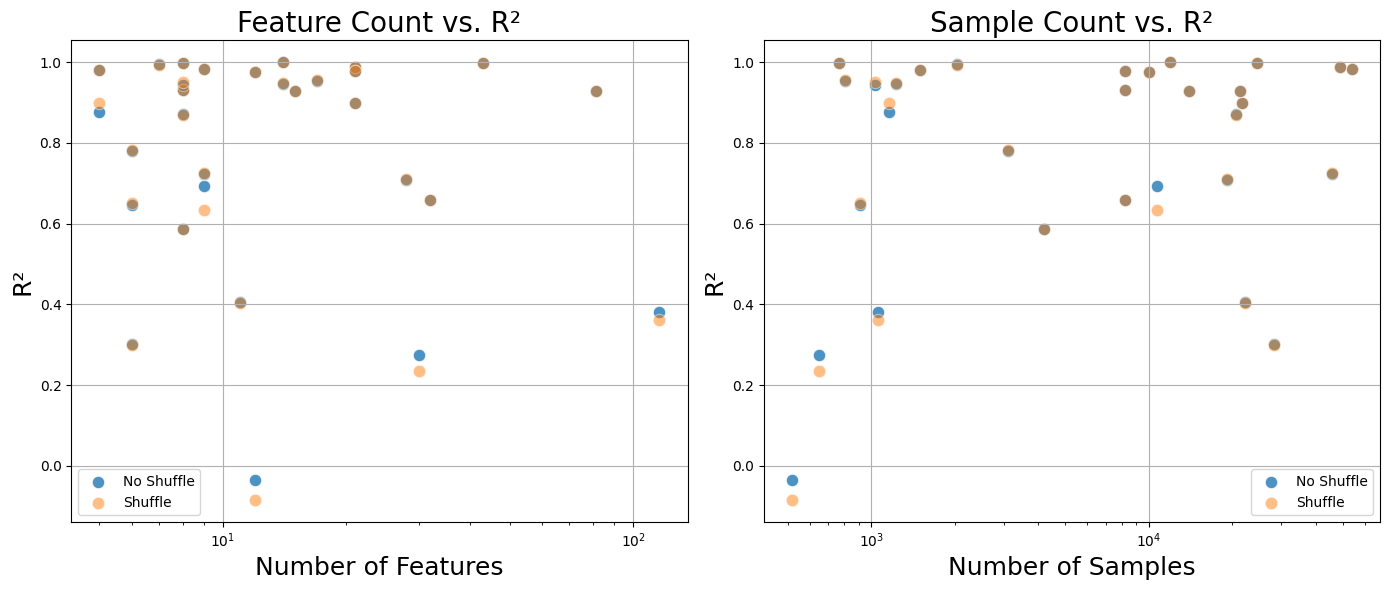

In [15]:
# ÂÅáËÆæ‰Ω†‰ªéÊñá‰ª∂ËØªÂèñÂêéÊòØËøôÊ†∑ÁöÑÔºö
df = pd.read_csv("ctr23_regression_dataset_R2_comparison.csv")
# üìä ÂèØËßÜÂåñ
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Âõæ1ÔºöÁâπÂæÅÊï∞ vs R2
sns.scatterplot(data=df, x="Features", y="R2_NoShuffle", label="No Shuffle", s=80, ax=axes[0], alpha=0.8)
sns.scatterplot(data=df, x="Features", y="R2_Shuffle", label="Shuffle", s=80, ax=axes[0], alpha=0.5)
axes[0].set_xscale("log")
axes[0].set_xlabel("Number of Features", fontsize=18)
axes[0].set_ylabel("R¬≤", fontsize=18)
axes[0].set_title("Feature Count vs. R¬≤", fontsize=20)
axes[0].legend()
axes[0].grid(True)

# Âõæ2ÔºöÊ†∑Êú¨Êï∞ vs R2
sns.scatterplot(data=df, x="Samples", y="R2_NoShuffle", label="No Shuffle", s=80, ax=axes[1], alpha=0.8)
sns.scatterplot(data=df, x="Samples", y="R2_Shuffle", label="Shuffle", s=80, ax=axes[1], alpha=0.5)
axes[1].set_xscale("log")
axes[1].set_xlabel("Number of Samples", fontsize=18)
axes[1].set_ylabel("R¬≤", fontsize=18)
axes[1].set_title("Sample Count vs. R¬≤", fontsize=20)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()